In [10]:
#knn
import numpy as np
import math as mp
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import seaborn as sns
from sklearn.metrics import accuracy_score

In [152]:
class KNN:
    
    def __init__(self,k=3):
        self.k=k
    
    def fit(self,x_train,y_train):
        
        self.x_train = x_train
        self.y_train = y_train
    
    def predict(self,x_test):
        
        train_data = self.x_train.to_numpy()
        train_class = self.y_train

        self.x_test = x_test
        test_data = self.x_test.to_numpy()   
        
        y_predict=[]
        self.y_predict = y_predict
        
           
        for i in test_data:
            distance=[]
            for j in train_data:
                d = mp.dist(i,j)
                distance.append(d)
                
            df=pd.DataFrame()
            df["x"]=train_data.tolist()
            df["y"]=self.y_train
            df["Distance"]=distance
            df.sort_values('Distance',inplace=True)
            result = st.mode(df['y'][:self.k].values)
            self.y_predict.append(result)
            
        return self.y_predict
    
    def visualize(self,y_test):
        
        x_test = self.x_test.to_numpy()   
        
        self.y_test = y_test
        y_test = self.y_test

        y_predict = self.y_predict
        
        plt.figure(figsize=(15,10))
        plt.subplot(2,1,1)
        plt.title("Actual values")
        sns.scatterplot(x=x_test[:,0],y=x_test[:,1],hue=y_test,palette={1:'b',0:'r',2:'y'})
        plt.subplot(2,1,2)
        plt.title("Model prediction")
        sns.scatterplot(x=x_test[:,0],y=x_test[:,1],hue=y_predict,palette={1:'b',0:'r',2:'y'})
      
        plt.tight_layout()
        plt.show()

In [153]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


In [154]:
x=datasets.load_iris()
df=pd.DataFrame(x.data,columns=x.feature_names)
x.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [155]:
y=x.target
data=df[["sepal width (cm)","petal width (cm)","sepal length (cm)"]]
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

In [156]:
kn=KNN(k=3)
r=kn.fit(X_train,y_train)
y_pred=kn.predict(X_test)

In [157]:
acc=accuracy_score(y_test,y_pred)
acc

0.96

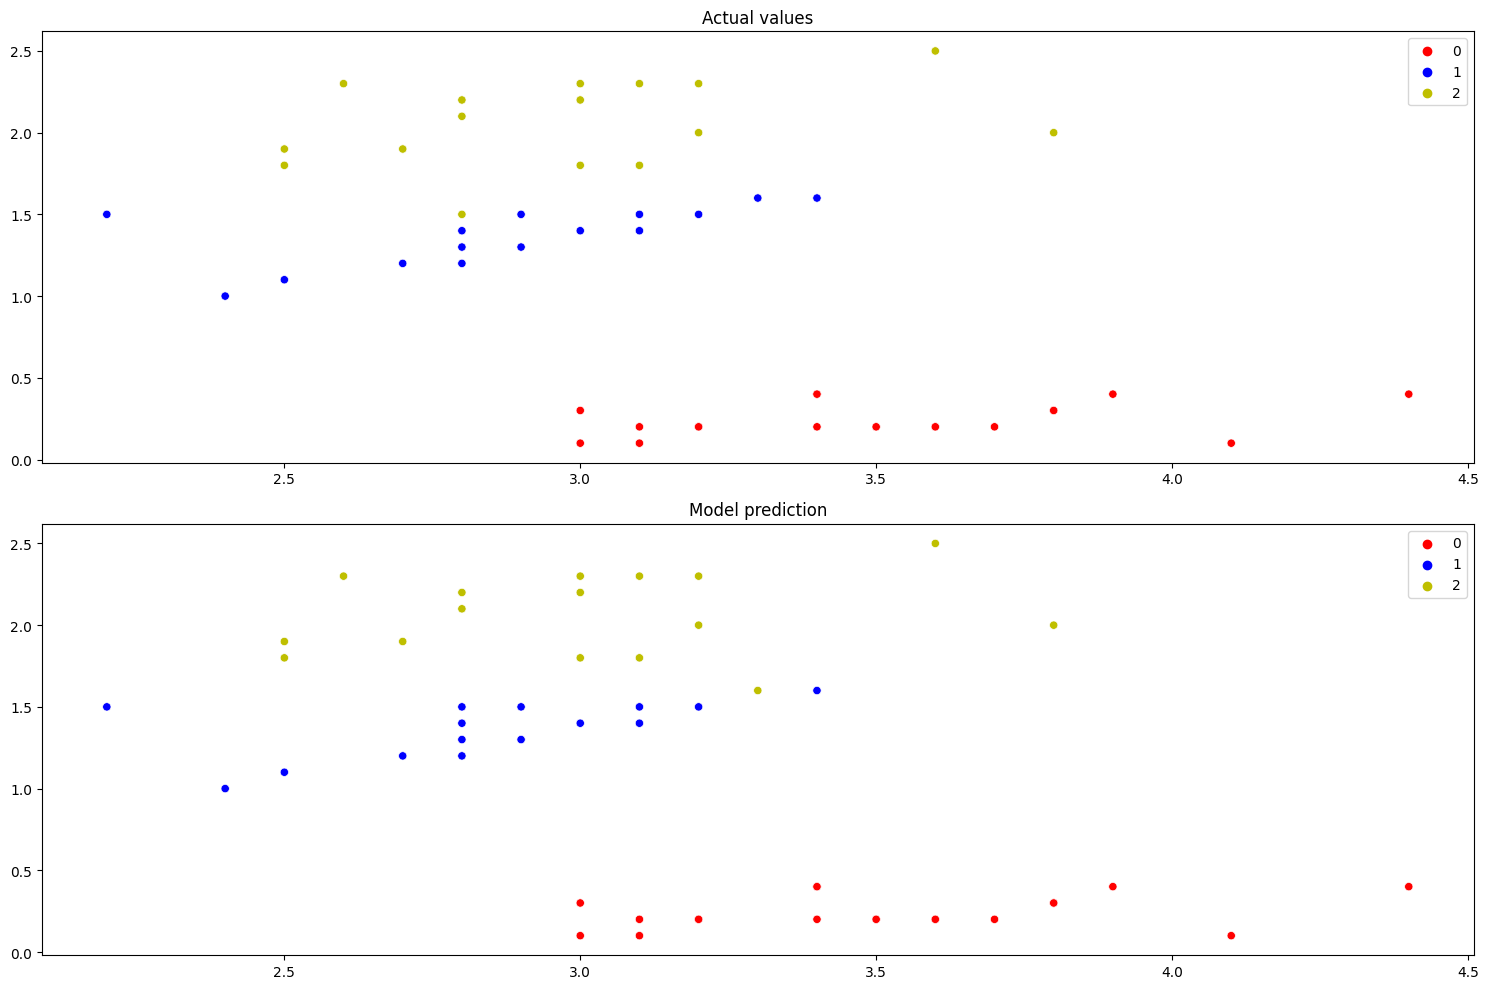

In [158]:
kn.visualize(y_test)